Michael Muschitiello // Computational Finance

- The notebook downloads ^SPX data from Yahoo Finance, calculates log returns, and derives the GBM parameters (mu and sigma). It then simulates GBM paths based on these parameters and plots both the historical closing prices and the simulated paths. Finally, it repeats a similar procedure for the RSP ticker.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math  
from time import time

## Calibration of a Stochastic Model
### Matching Moments to GBM Parameters

We match the moments of to GBM parameters by using historical data to ensure the model aligns with emprirical data, at least up to the first two moments. We want the theoretical mean and variance of GBM to match the estimates of historical (log)returns. This is a simple way to model the price of a stock, and in fact, the naive nature of this experiment is to quantify the implications of using Beta in the context of a CAPM model to forecast returns of individual stocks. By doing this, we are ensuring that *on average* the GBM model has the same growth rate and volatility as the observed process. This will help us to capture 'expected growth rate' and 'average volatility' 

# ^SPX

[*********************100%***********************]  1 of 1 completed


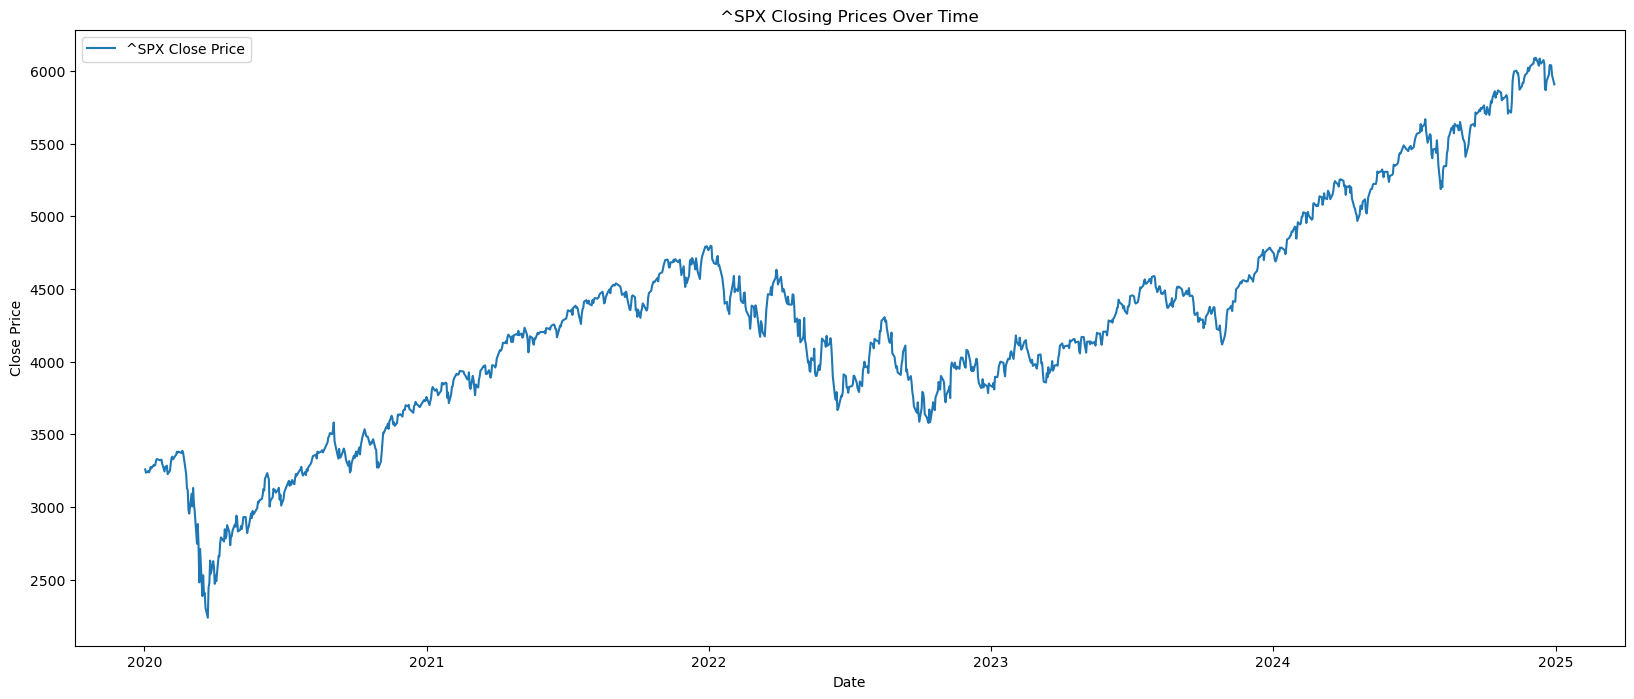

In [2]:
import yfinance as yf
import datetime

ticker = "^SPX"
start = '2020-01-01'
end = '2024-12-31'

SPX = yf.download(ticker, start=start, end=end)

plt.figure(figsize=(20,8))
plt.plot(SPX.index, SPX['Close'], label='^SPX Close Price')
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("^SPX Closing Prices Over Time")
plt.legend()
plt.show()

In [3]:
# compute logarithmic returns
dt = 1/252

log_rets = np.log(SPX['Close'] / SPX['Close'].shift(1)).dropna()

sigma = (log_rets.std()/dt**0.5).values
mu = (log_rets.mean()/dt + sigma**2/2).values

In [4]:
cum_logret_spx = np.cumsum(log_rets)
annualized_vol_spx = log_rets.std() * np.sqrt(252)
annualized_vol_spx

Ticker
^SPX    0.214375
dtype: float64

In [5]:

cum_logret_spx = cum_logret_spx.iloc[-1].values
print(f"The cumulative Log Returns of SPX over the time period is: {cum_logret_spx}")

The cumulative Log Returns of SPX over the time period is: [0.59506042]


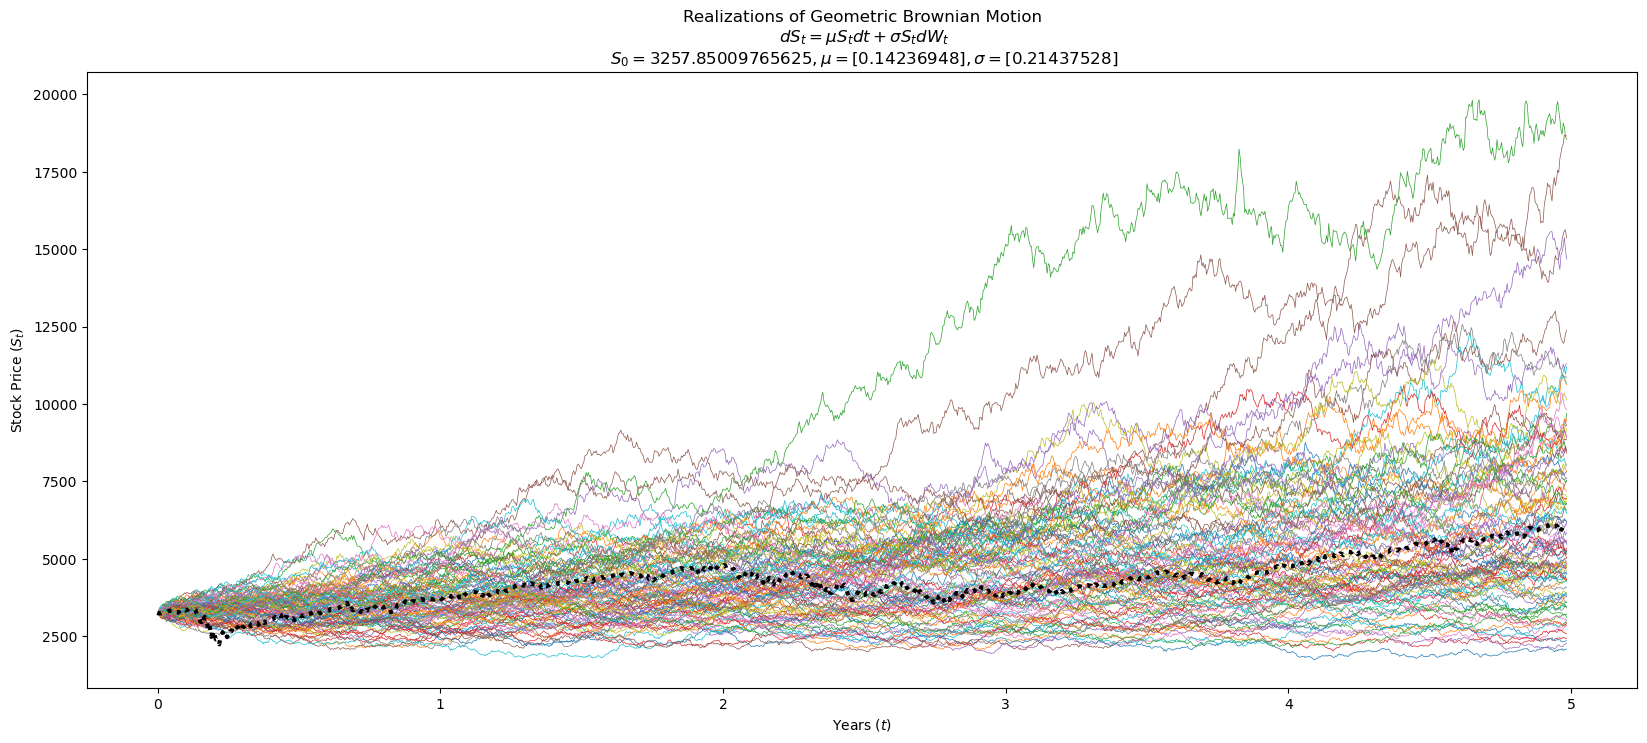

In [6]:
# simulating GBM Paths

# number of steps
n = log_rets.shape[0]

# initial stock price
S0 = SPX['Close'].iloc[0].iloc[0]

# number of sims
M = 100

# simulation using Numpy arrays
St = np.exp(
    (mu - sigma**2/2)*dt + sigma * np.random.normal(0, np.sqrt(dt), size=(M, n)).T
)

# include array of 1's
St = np.vstack([np.ones(M), St])

# multiply through by S0 and return the cumulative product of elements along a given simulation path (axis=0)
St = S0 * St.cumprod(axis=0)

time = np.linspace(0, n/252, n+1)

# require numpy array that is the same shape as St
tt = np.full(shape=(M, n+1), fill_value=time).T

plt.figure(figsize=(20, 8))  # Adjusted figure size for landscape orientation
plt.plot(tt, St, linewidth=0.5)  # Thinner lines for paths
plt.xlabel("Years $(t)$")
plt.ylabel("Stock Price $(S_t)$")
plt.title(
    "Realizations of Geometric Brownian Motion\n $dS_t = \\mu S_t dt + \\sigma S_t dW_t$\n $S_0 = {0}, \\mu = {1}, \\sigma = {2}$".format(S0, mu, sigma)
)
plt.plot(time, SPX['Close'].values, linestyle='dotted', linewidth=3.0, color = 'black', zorder=n+2)
plt.show()

# ^RSP

[*********************100%***********************]  1 of 1 completed


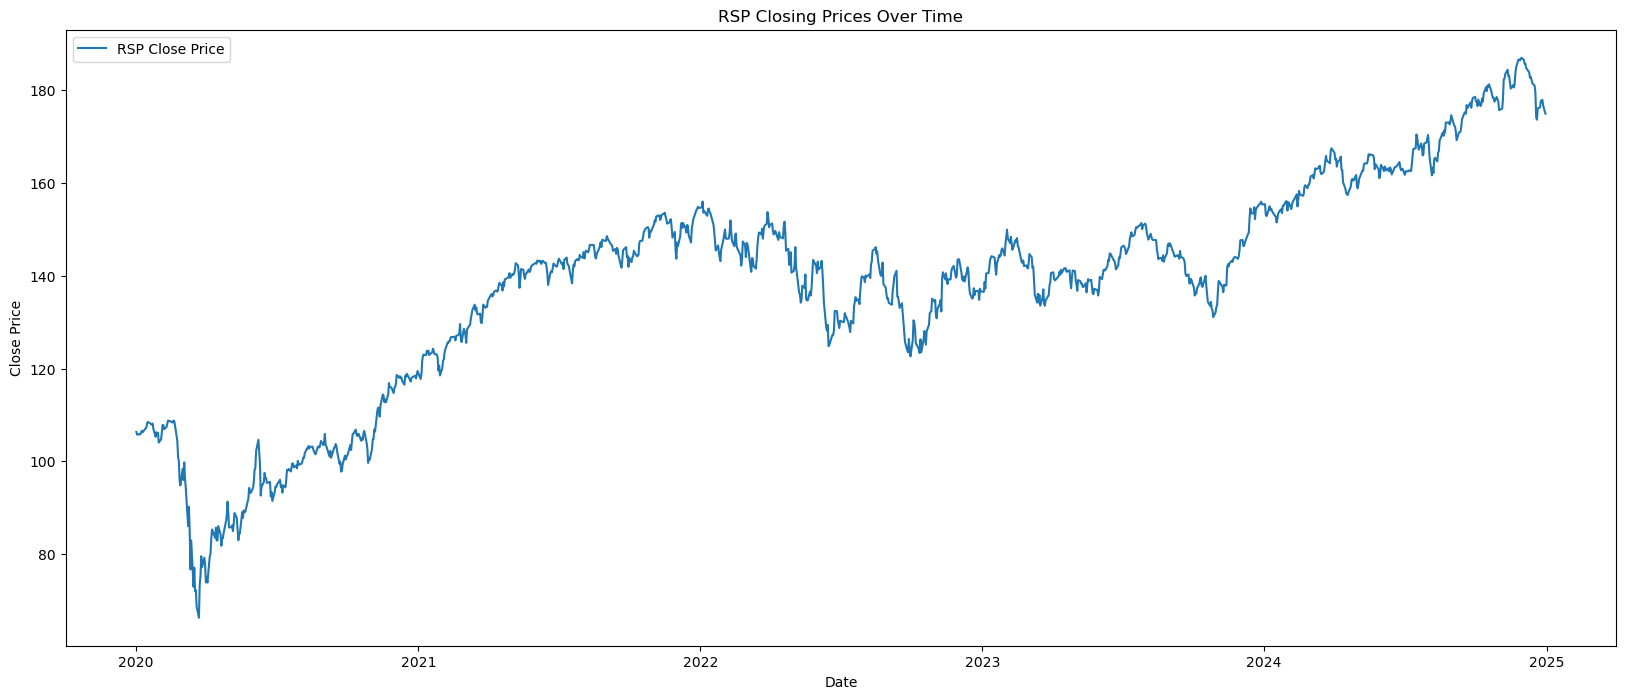

In [7]:
ticker = "RSP"
start = '2020-01-01'
end = '2024-12-31'

RSP = yf.download(ticker, start=start, end=end)

plt.figure(figsize=(20,8))
plt.plot(RSP.index, RSP['Close'], label='RSP Close Price')
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("RSP Closing Prices Over Time")
plt.legend()
plt.show()

In [8]:
# compute logarithmic returns
dt = 1/252

log_rets_rsp = np.log(RSP['Close'] / RSP['Close'].shift(1)).dropna()

sigma_rsp = (log_rets_rsp.std()/dt**0.5).values
mu_rsp = (log_rets_rsp.mean()/dt + sigma_rsp**2/2).values

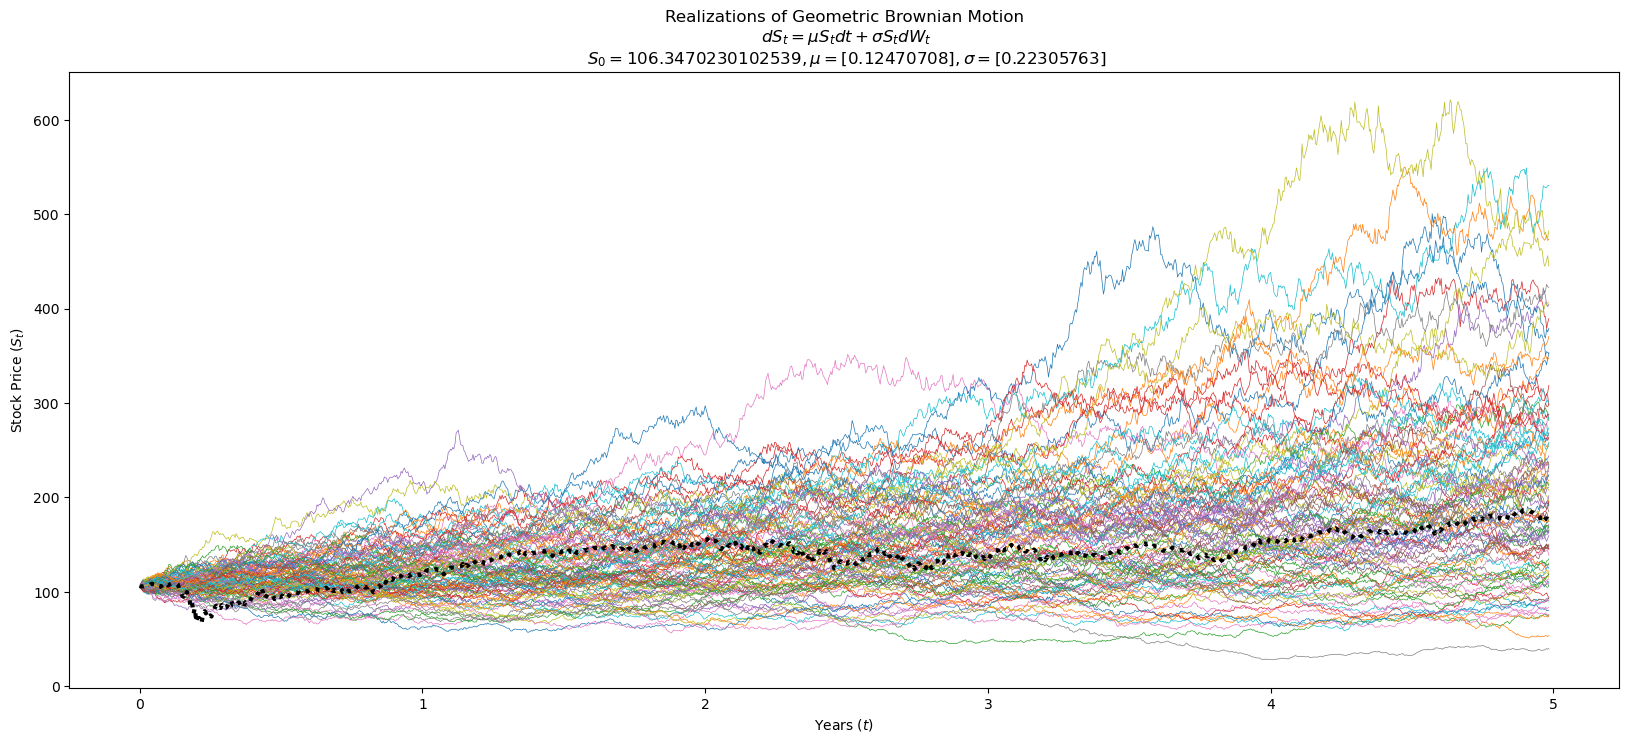

In [9]:
# simulating GBM Paths

# number of steps
n = log_rets_rsp.shape[0]

# initial stock price
S0 = RSP['Close'].iloc[0].iloc[0]

# number of sims
M = 100

# simulation using Numpy arrays
St = np.exp(
    (mu_rsp - sigma_rsp**2/2)*dt + sigma_rsp * np.random.normal(0, np.sqrt(dt), size=(M, n)).T
)

# include array of 1's
St = np.vstack([np.ones(M), St])

# multiply through by S0 and return the cumulative product of elements along a given simulation path (axis=0)
St = S0 * St.cumprod(axis=0)

time = np.linspace(0, n/252, n+1)

# require numpy array that is the same shape as St
tt = np.full(shape=(M, n+1), fill_value=time).T

plt.figure(figsize=(20, 8))  
plt.plot(tt, St, linewidth=0.5)  
plt.xlabel("Years $(t)$")
plt.ylabel("Stock Price $(S_t)$")
plt.title(
    "Realizations of Geometric Brownian Motion\n $dS_t = \\mu S_t dt + \\sigma S_t dW_t$\n $S_0 = {0}, \\mu = {1}, \\sigma = {2}$".format(S0, mu_rsp, sigma_rsp)
)
plt.plot(time, RSP['Close'].values, linestyle='dotted', linewidth=3.0, color = 'black', zorder=n+2)
plt.show()

In [10]:
print(f"Mu for SPX: {mu}")
print(f"Sigma for SPX: {sigma}")
print()
print(f"Mu for RSP: {mu_rsp}")
print(f"Sigma for RSP: {sigma_rsp}")

Mu for SPX: [0.14236948]
Sigma for SPX: [0.21437528]

Mu for RSP: [0.12470708]
Sigma for RSP: [0.22305763]


These are DRASTICALLY different from the expected market returns I calculated in previous file. Something to note: The mu for RSP will be nearly entirely engulfed by the current 1yCMT that is used in the CAPM calculation for expected returns of stocks. How can we fix this, or approach it differently? 